### EAL-24f. EMPRESAS DEL SECTOR SERVICIOS QUE PROPORCIONARON FORMACIÓN A SUS TRABAJADORES, SEGÚN GRADO DE LIMITACIÓN A LA FORMACIÓN  QUE SUPUSIERON CIERTOS MOTIVOS

In [10]:
import pandas as pd
from pathlib import Path

carpeta_excels = Path.home() / "Escritorio" / "excels_EAL"
datos_combinados = []

for archivo in carpeta_excels.glob("*.xls*"):
    if archivo.name.startswith("~$"):
        continue
    try:
        if archivo.name == "Tablas_EAL_2023.xlsx":
            df = pd.read_excel(archivo, sheet_name="EAL-24", header=None,
                               engine="openpyxl" if archivo.suffix == ".xlsx" else None)
            df_recorte = df.iloc[98:109].copy()
        elif archivo.name in ["Tablas_EAL_2022.xlsx", "TABLAS_EAL_2021.xlsx"]:
            df = pd.read_excel(archivo, sheet_name="EAL-24", header=None,
                               engine="openpyxl" if archivo.suffix == ".xlsx" else None)
            df_recorte = df.iloc[92:101].copy()
        elif archivo.name == "TABLAS_EAL_2020.xls":
            df = pd.read_excel(archivo, sheet_name="EAL-24", header=None,
                               engine="openpyxl" if archivo.suffix == ".xlsx" else None)
            df_recorte = df.iloc[90:99].copy()
        elif archivo.name in ["TABLAS_EAL_2019.xlsx", "TABLAS_EAL_2019.xls"]:
            df = pd.read_excel(archivo, sheet_name="EAL-24", header=None,
                               engine="openpyxl" if archivo.suffix == ".xlsx" else None)
            df_recorte = df.iloc[91:100].copy()
        else:
            continue
        df_recorte["Fuente"] = archivo.stem
        datos_combinados.append(df_recorte)
        print(f"✅ Filas extraídas de {archivo.name}")
    except Exception as e:
        print(f"❌ Error con {archivo.name}: {e}")

# Combinar todos los DataFrames
df_final = pd.concat(datos_combinados, ignore_index=True)

# Mostrar una muestra
print("\n🧾 Muestra del DataFrame combinado:")
print(df_final.head())

✅ Filas extraídas de TABLAS_EAL_2019.xls
✅ Filas extraídas de TABLAS_EAL_2020.xls
✅ Filas extraídas de TABLAS_EAL_2021.xlsx
✅ Filas extraídas de Tablas_EAL_2022.xlsx
✅ Filas extraídas de Tablas_EAL_2023.xlsx

🧾 Muestra del DataFrame combinado:
                                                   0    1       2       3  \
0  El nivel de formación de los empleados era el ...  100  13.179  28.546   
1  La estrategia preferida de la empresa fue cont...  100  24.645  29.041   
2  Dificultad para evaluar la necesidades de form...  100  30.468  54.968   
3  La falta de cursos de formación adecuados en e...  100  25.501   46.19   
4           El alto coste de los cursos de formación  100  19.927  34.443   

        4       5           Fuente  
0  45.004  13.271  TABLAS_EAL_2019  
1  35.761  10.553  TABLAS_EAL_2019  
2  12.985   1.579  TABLAS_EAL_2019  
3  22.068    6.24  TABLAS_EAL_2019  
4  32.569  13.061  TABLAS_EAL_2019  


In [11]:
# Renombrar las columnas 0 a 5
df_final.rename(columns={
    0: 'motivo',
    1: 'total',
    2: 'nada',
    3: 'poco',
    4: 'bastante',
    5: 'mucho'
}, inplace=True)

# Mostrar

In [12]:
df_final

,motivo,total,nada,poco,bastante,mucho,Fuente
0,El nivel de formación de los empleados era el ...,100,13.179,28.546,45.004,13.271,TABLAS_EAL_2019
1,La estrategia preferida de la empresa fue cont...,100,24.645,29.041,35.761,10.553,TABLAS_EAL_2019
2,Dificultad para evaluar la necesidades de form...,100,30.468,54.968,12.985,1.579,TABLAS_EAL_2019
3,La falta de cursos de formación adecuados en e...,100,25.501,46.19,22.068,6.24,TABLAS_EAL_2019
4,El alto coste de los cursos de formación,100,19.927,34.443,32.569,13.061,TABLAS_EAL_2019
5,El mayor esfuerzo realizado en años anteriores...,100,25.855,49.753,21.126,3.266,TABLAS_EAL_2019
6,La elevada carga de trabajo y el escaso tiempo...,100,10.804,26.158,42.043,20.995,TABLAS_EAL_2019
7,Dificultad para acceder a ayudas o subvencione...,100,19.13,36.743,28.97,15.156,TABLAS_EAL_2019
8,El nivel de formación de los empleados era el ...,100,10.567,12.991,61.078,15.364,TABLAS_EAL_2020
9,La estrategia preferida de la empresa fue cont...,100,34.293,20.911,35.687,9.109,TABLAS_EAL_2020


In [13]:
# Verifica si hay filas duplicadas en df_final
duplicados = df_final.duplicated()
print(f"Número de filas duplicadas: {duplicados.sum()}")

# Si quieres ver las filas duplicadas:
df_duplicados = df_final[df_final.duplicated(keep=False)]
print(df_duplicados)

Número de filas duplicadas: 0
Empty DataFrame
Columns: [motivo, total, nada, poco, bastante, mucho, Fuente]
Index: []


In [14]:
# Busca la(s) fila(s) que contienen exactamente ese texto en la columna 'motivo'
filtro = df_final['motivo'] == "El nivel de formación de los empleados era el apropiado para las necesidades de la empresa"
df_formacion_apropiada = df_final[filtro].copy()

# Si quieres resetear el índice:
df_formacion_apropiada.reset_index(drop=True, inplace=True)

# Mostrar el resultado
print(df_formacion_apropiada)

                                              motivo total    nada    poco  \
0  El nivel de formación de los empleados era el ...   100  13.179  28.546   
1  El nivel de formación de los empleados era el ...   100  10.567  12.991   
2  El nivel de formación de los empleados era el ...   100   8.612  21.465   
3  El nivel de formación de los empleados era el ...   100   6.804  18.486   
4  El nivel de formación de los empleados era el ...   100   8.198  17.574   

  bastante   mucho           Fuente  
0   45.004  13.271  TABLAS_EAL_2019  
1   61.078  15.364  TABLAS_EAL_2020  
2   52.856  17.067  TABLAS_EAL_2021  
3   58.857  15.853  Tablas_EAL_2022  
4    56.83  17.398  Tablas_EAL_2023  


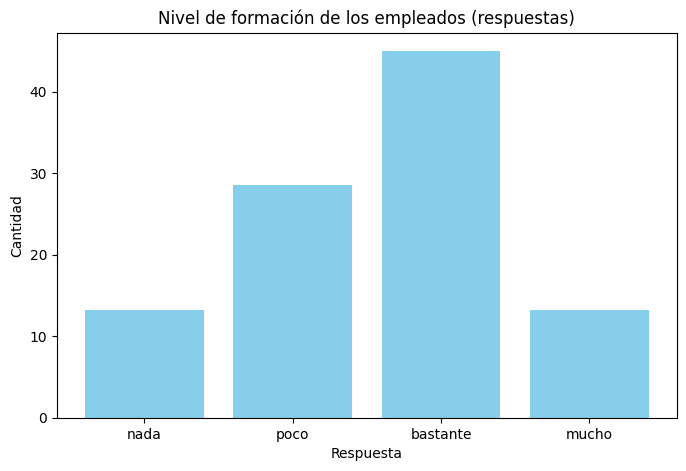

In [15]:
import matplotlib.pyplot as plt

# Selecciona solo las columnas de interés (ajusta si tienes más columnas)
columnas_respuestas = ['nada', 'poco', 'bastante', 'mucho']
valores = df_formacion_apropiada.loc[0, columnas_respuestas]

plt.figure(figsize=(8,5))
plt.bar(columnas_respuestas, valores, color='skyblue')
plt.title('Nivel de formación de los empleados (respuestas)')
plt.xlabel('Respuesta')
plt.ylabel('Cantidad')
plt.show()

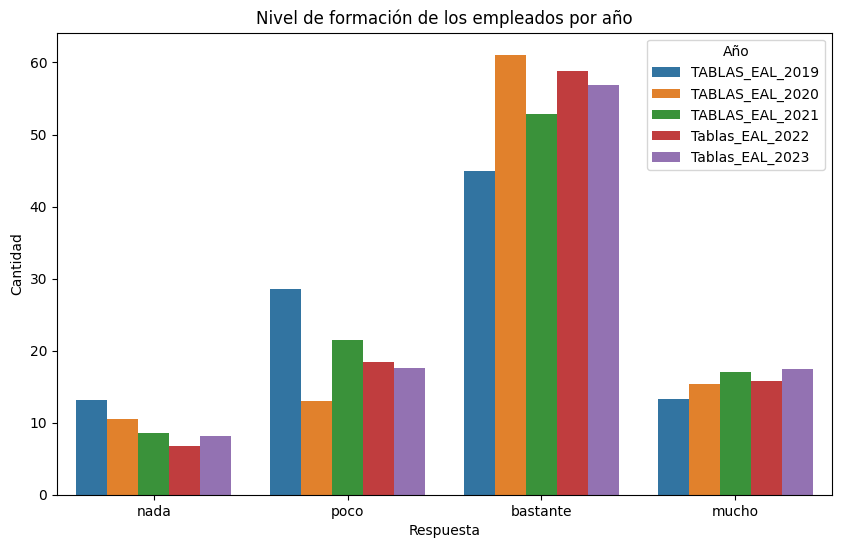

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Selecciona solo las columnas de interés y la columna Fuente
columnas_respuestas = ['nada', 'poco', 'bastante', 'mucho', 'Fuente']
df_plot = df_formacion_apropiada[columnas_respuestas].copy()

# Convierte a formato largo para facilitar el gráfico
df_melt = df_plot.melt(id_vars='Fuente', var_name='Respuesta', value_name='Cantidad')

plt.figure(figsize=(10,6))
sns.barplot(data=df_melt, x='Respuesta', y='Cantidad', hue='Fuente')
plt.title('Nivel de formación de los empleados por año')
plt.xlabel('Respuesta')
plt.ylabel('Cantidad')
plt.legend(title='Año')
plt.show()